In [1]:
import numpy as np
from scipy import signal as sg
from scipy.ndimage import filters, measurements as measure, morphology as morph

from skimage.morphology import skeletonize, remove_small_objects
from skimage.measure import label, regionprops

import sys
sys.path.append("/home/tintin/rongheng/cv/")
from lib.image_lib import load_img, show_img, show_hist, resize_img, save_img
from lib.edge_lib import threshold, get_points, overlay_points


img = load_img("bearing_scrached_fuji_tunnel.jpg") 

# Input image

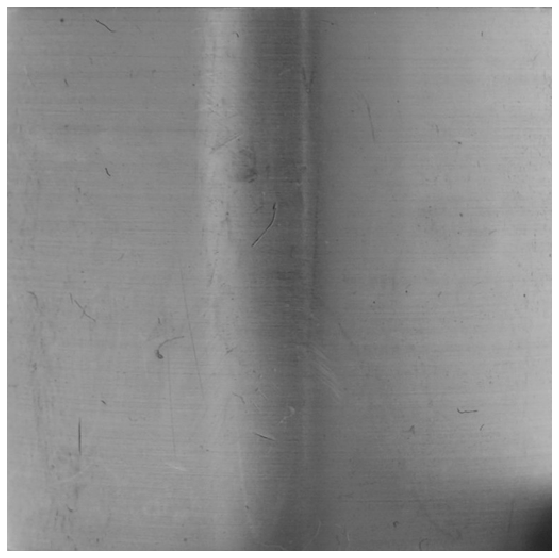

In [2]:
show_img(img, color="bw")

# Sobel edge detection

In [3]:
def sobel(img, sigma = 1):
    # Vertical Edges
    img_x = np.zeros(img.shape)
    filters.gaussian_filter(img, (sigma, sigma), (0, 1), img_x)
    
    # Horizontal Edges
    img_y = np.zeros(img.shape)
    filters.gaussian_filter(img, (sigma, sigma), (1, 0), img_y)
    
    # Magnitude
    magnitude = np.sqrt(img_x**2 + img_y**2)
    
    return magnitude

[[1.35397791 2.38234345 1.70319606 ... 4.10607517 4.53215972 4.12195005]
 [2.27657383 3.2175367  3.20472727 ... 7.5875851  8.69452195 9.3601564 ]
 [2.89840838 3.70989821 3.85397167 ... 4.67152731 5.8113715  7.01883437]
 ...
 [3.17056907 5.1580216  3.55060751 ... 0.34252982 0.35700791 0.35695164]
 [2.78365941 4.49005561 5.74805118 ... 0.2523361  0.26281619 0.35726879]
 [3.48325196 3.41583202 2.79834453 ... 0.25233696 0.49479488 0.55077297]]


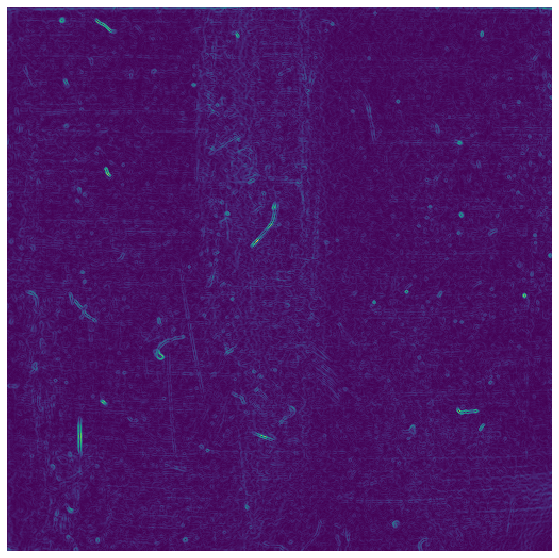

In [57]:
response_img = sobel(img, sigma=0.4)
print(response_img)
show_img(response_img)

### Threshold and binary

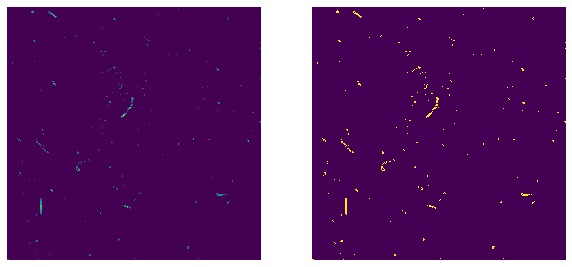

In [58]:
thresh_img = threshold(response_img, 4)
binary_img = thresh_img.astype(bool)

show_img(thresh_img, binary_img)

# Connect neighboring regions
using first a morphological dialation to connect the neighboring regions and then skeletonizing the regions again to end up with the precise markings.

[[False  True False]
 [ True  True  True]
 [False  True False]]


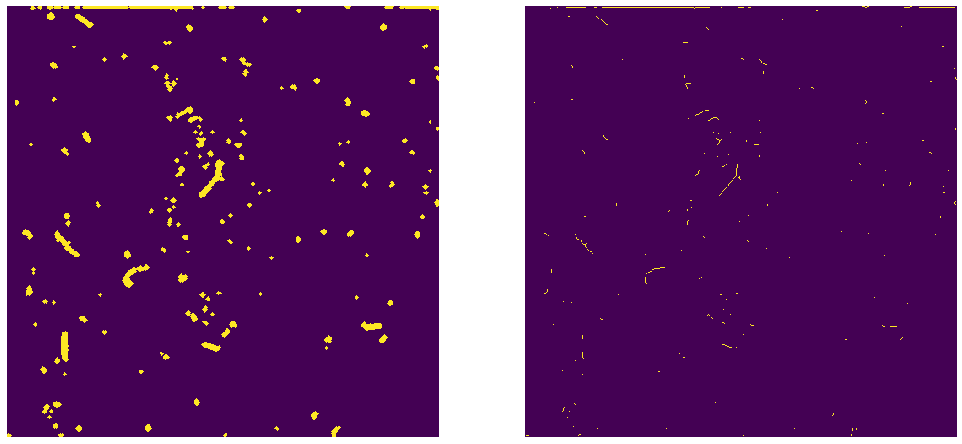

In [71]:
struct = morph.generate_binary_structure(2,1)
print(struct)

dial_img = morph.binary_dilation(binary_img, 
                                 structure=struct, iterations=2)
skeleton_img = skeletonize(dial_img,)

show_img(dial_img, skeleton_img, size=(17,17))

## Keep only the big scraches
We start by lableing all connected regions and sorting them by area (try eccentricity?). We then only keep the ones that are bigger than a certain size.

In [72]:
label_img = label(skeleton_img)
scraches_img = remove_small_objects(label_img, 17)

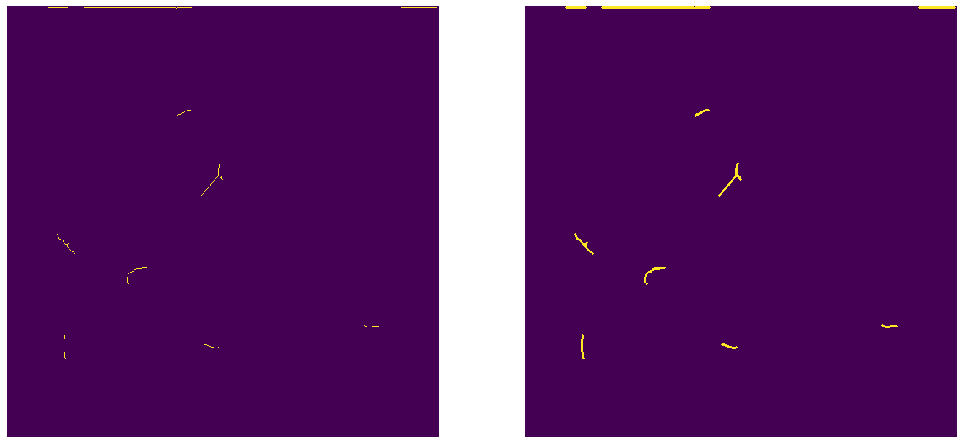

In [73]:
dial_img = morph.binary_dilation(scraches_img, structure=struct,
                                 iterations=1)
show_img(scraches_img.astype(bool), dial_img, size=(17,17))

# Points on Image
Extract the points from the result image and overlay them on the input image.

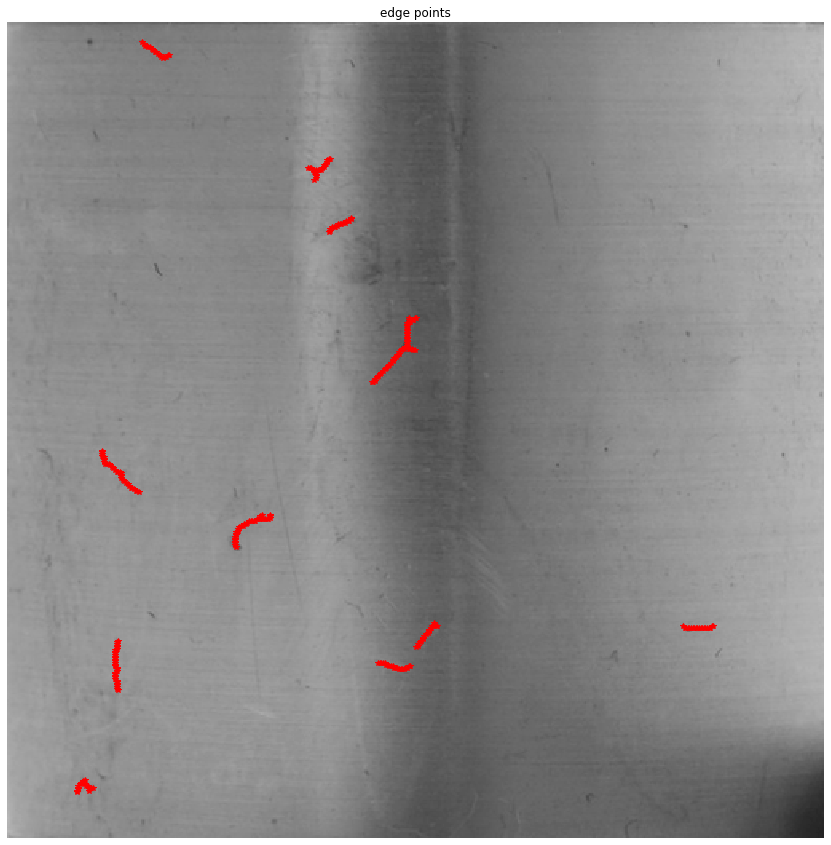

In [69]:
points = get_points(scraches_img, min_dist=10, allow_cluster=True)
overlay_points(img, points)